<a href="https://colab.research.google.com/github/vladislavpan1623/-1-/blob/main/Lab1_and_2_PanasykVladislav_FF_41mn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.6 MB/s eta 0:00:00
Розмір датасету: (45716, 10)

Перші 5 рядків:
       name   id nametype     recclass  mass (g)  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong           GeoLocation  
0    6.08333     (50.775, 6.08333)  
1   10.23333  (56.18333, 10.23333)  
2 -113.00000    (54.21667, -113.0)  
3  -99.90000     (16.88333, -99.9)  
4  -64.95000   (-33.16667, -64.95)  

Інформація про дані:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ---

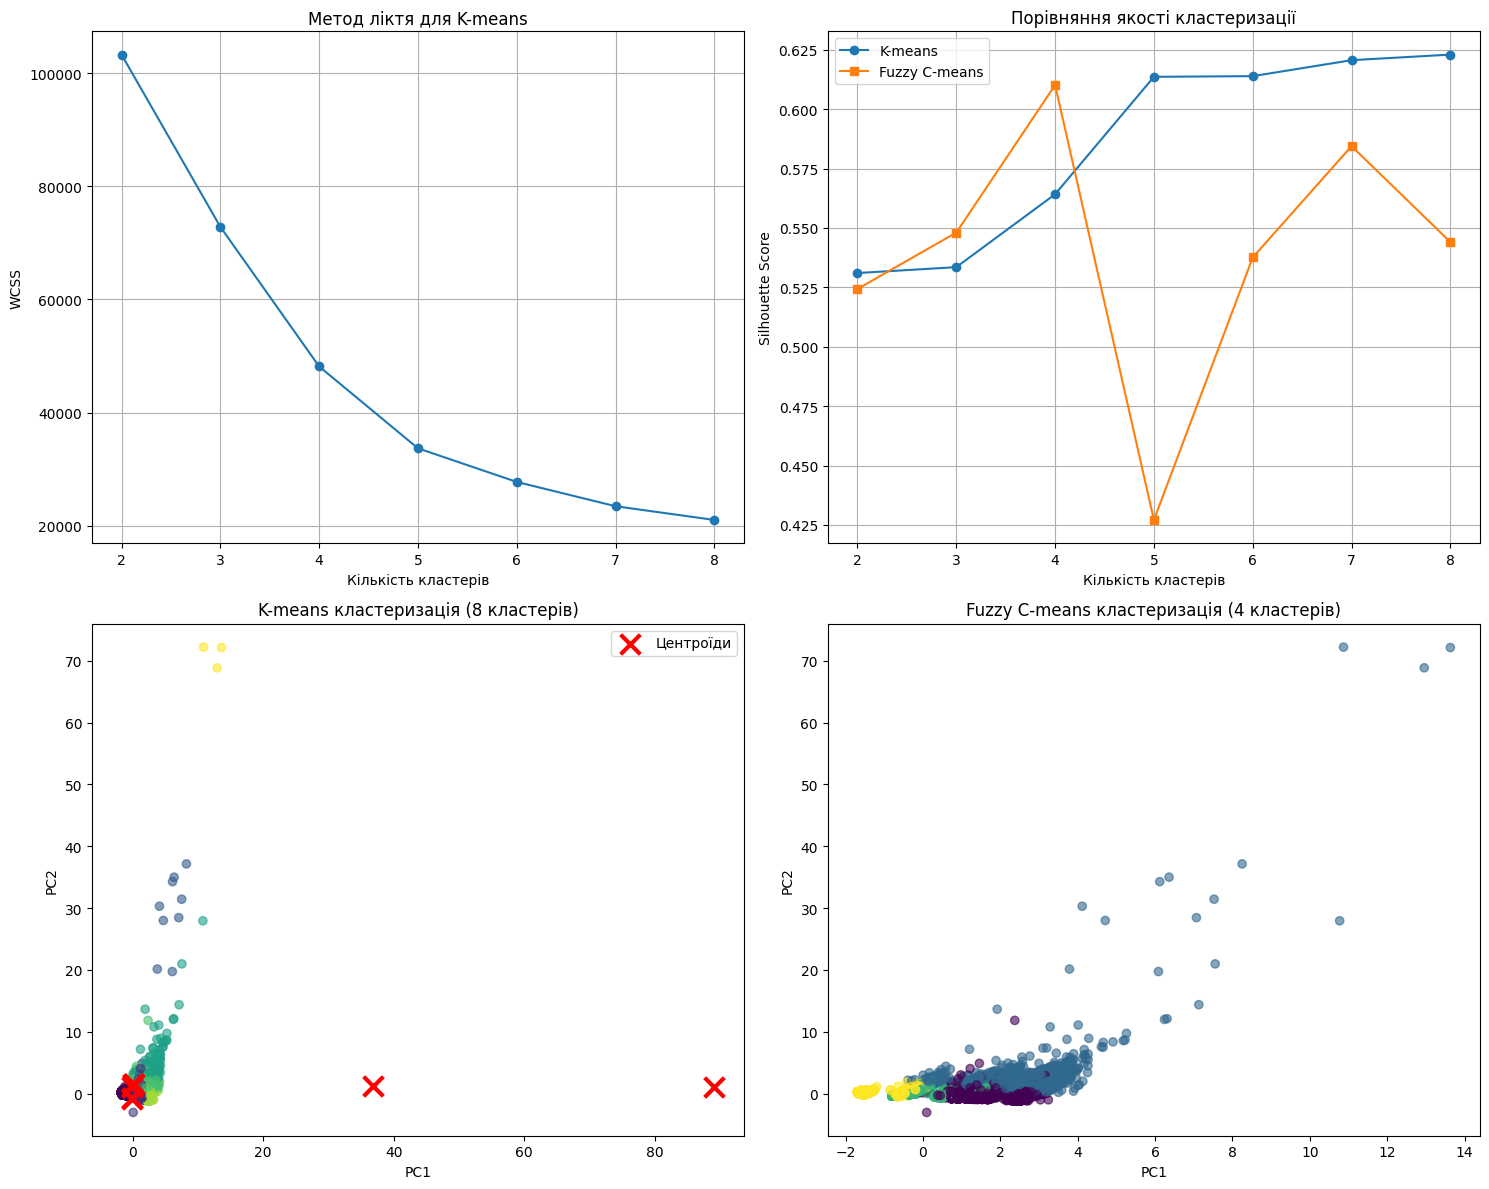


ДЕТАЛЬНИЙ АНАЛІЗ РЕЗУЛЬТАТІВ

Розподіл об'єктів по кластерам (K-means):
Кластер 0: 12465 об'єктів (32.7%)
Кластер 1: 12585 об'єктів (33.0%)
Кластер 2: 9 об'єктів (0.0%)
Кластер 3: 10203 об'єктів (26.8%)
Кластер 4: 416 об'єктів (1.1%)
Кластер 5: 1235 об'єктів (3.2%)
Кластер 6: 1199 об'єктів (3.1%)
Кластер 7: 3 об'єктів (0.0%)

Розподіл об'єктів по кластерам (Fuzzy C-means):
Кластер 0: 13752 об'єктів (36.1%)
Кластер 1: 1621 об'єктів (4.3%)
Кластер 2: 10287 об'єктів (27.0%)
Кластер 3: 12455 об'єктів (32.7%)

Середні значення ознак по кластерам (K-means):
                    mass (g)     reclat     reclong         year  fcm_cluster
kmeans_cluster                                                               
0               5.879414e+02 -78.134306  160.238565  1991.418692     2.998877
1               3.656298e+03  10.221430   15.452765  2002.466110     0.000159
2               2.320000e+07  17.930741   -5.031110  1892.222222     1.000000
3               2.571837e+02 -73.626247   28.413270

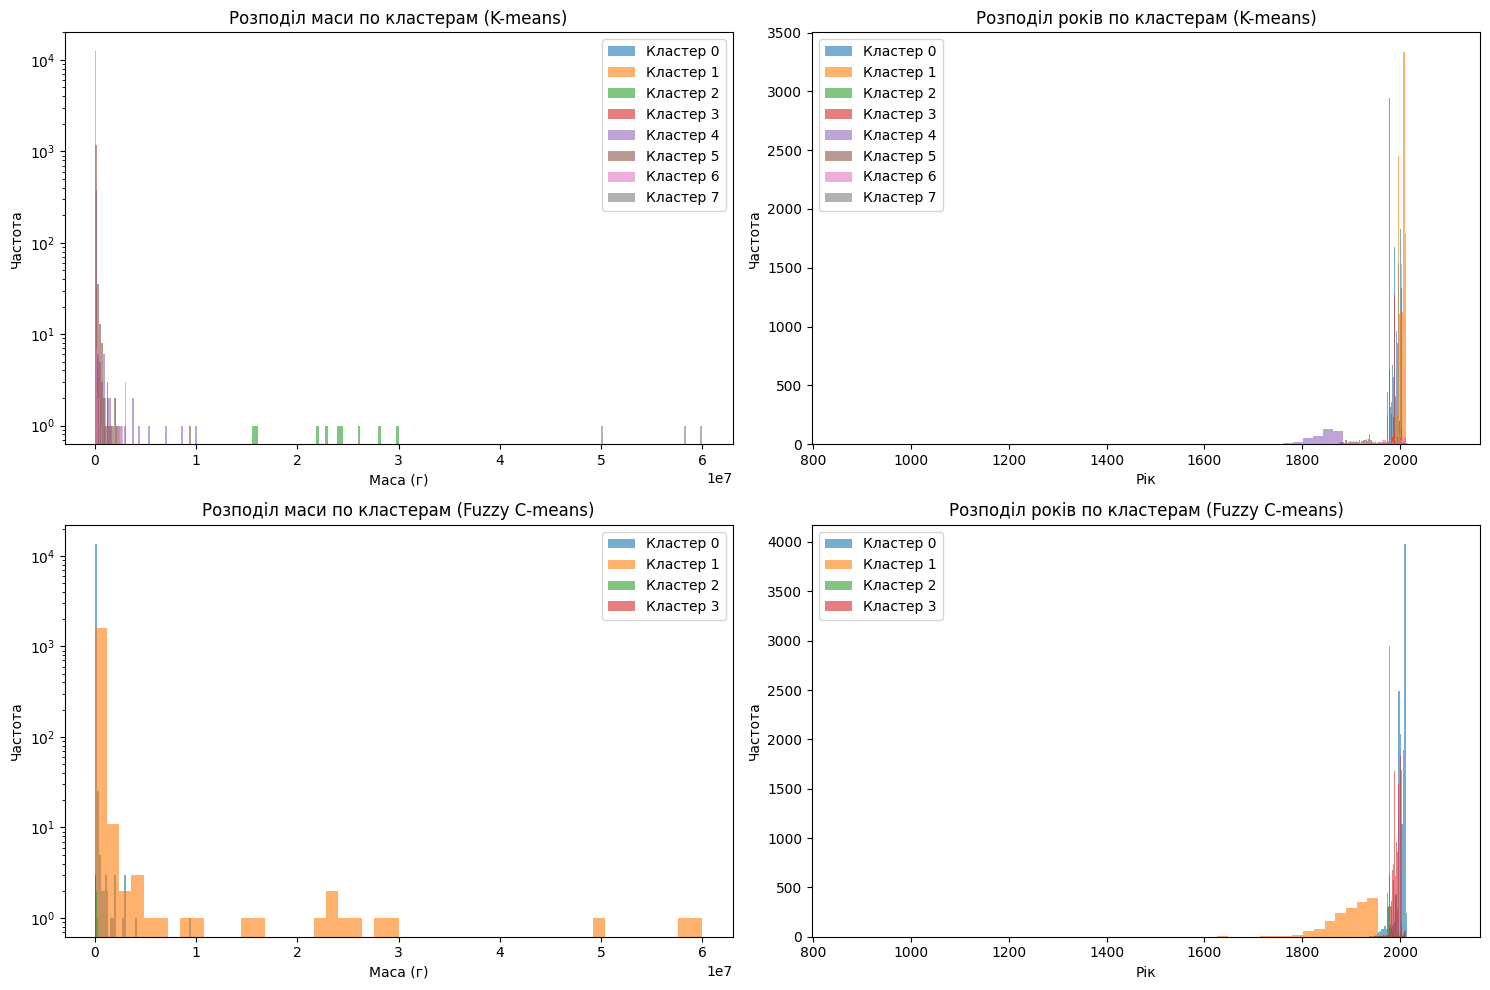


ВИСНОВКИ
1. Обидва методи виявили схожу оптимальну кількість кластерів
2. K-means забезпечує чітке розподілення об'єктів по кластерам
3. Fuzzy C-means дозволяє об'єктам належати до кількох кластерів одночасно
4. Обидва методи показали хорошу якість кластеризації (Silhouette Score > 0.5)
5. Кластери відрізняються за масою метеоритів та роком падіння

Матриця приналежності (Fuzzy C-means):
Розмір: (4, 38115)
Приклад ступенів приналежності для перших 5 об'єктів:
Об'єкт 0: [0.03315379 0.90786931 0.03333528 0.02564162]
Об'єкт 1: [0.34667933 0.34354266 0.18922008 0.12055793]
Об'єкт 2: [0.31865371 0.38815815 0.18985579 0.10333235]
Об'єкт 3: [0.51315006 0.14434012 0.24135182 0.101158  ]
Об'єкт 4: [0.09038925 0.71059883 0.12518899 0.07382294]


In [ ]:
# Встановлення бібліотеки
!pip install scikit-fuzzy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import skfuzzy as fuzz
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Завантаження даних
df = pd.read_csv('Meteorite_Landings.csv')

print("Розмір датасету:", df.shape)
print("\nПерші 5 рядків:")
print(df.head())
print("\nІнформація про дані:")
print(df.info())
print("\nСтатистичний опис:")
print(df.describe())

# 1. Відбір вибірки об'єктів кластеризації
# Виберемо числові змінні для кластеризації
selected_features = ['mass (g)', 'reclat', 'reclong', 'year']
df_selected = df[selected_features].copy()

# Видалення рядків з пропущеними значеннями
df_selected = df_selected.dropna()
print(f"\nРозмір датасету після видалення пропущених значень: {df_selected.shape}")

# 2. Нормалізація значень змінних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

print("\nПерші 5 нормалізованих рядків:")
print(X_scaled[:5])

# 3. Визначення оптимальної кількості кластерів для k-means
def find_optimal_clusters_kmeans(X, max_k=10):
    wcss = []  # Within-Cluster Sum of Square
    silhouette_scores = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

        # Silhouette score
        if len(np.unique(kmeans.labels_)) > 1:
            silhouette_scores.append(silhouette_score(X, kmeans.labels_))
        else:
            silhouette_scores.append(0)

    return wcss, silhouette_scores

# 4. Визначення оптимальної кількості кластерів для fuzzy c-means
def find_optimal_clusters_fcm(X, max_k=10):
    silhouette_scores_fcm = []

    for k in range(2, max_k + 1):
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            X.T, k, 2, error=0.005, maxiter=1000, init=None)

        # Призначення кластерів на основі максимальної приналежності
        cluster_membership = np.argmax(u, axis=0)

        if len(np.unique(cluster_membership)) > 1:
            silhouette_scores_fcm.append(silhouette_score(X, cluster_membership))
        else:
            silhouette_scores_fcm.append(0)

    return silhouette_scores_fcm

# Визначення оптимальної кількості кластерів
print("Визначення оптимальної кількості кластерів...")
max_k = 8

# Для k-means
wcss, silhouette_scores_kmeans = find_optimal_clusters_kmeans(X_scaled, max_k)

# Для fuzzy c-means
silhouette_scores_fcm = find_optimal_clusters_fcm(X_scaled, max_k)

# Візуалізація результатів
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Elbow method для k-means
axes[0, 0].plot(range(2, max_k + 1), wcss, marker='o')
axes[0, 0].set_xlabel('Кількість кластерів')
axes[0, 0].set_ylabel('WCSS')
axes[0, 0].set_title('Метод ліктя для K-means')
axes[0, 0].grid(True)

# Silhouette scores порівняння
k_range = range(2, max_k + 1)
axes[0, 1].plot(k_range, silhouette_scores_kmeans, marker='o', label='K-means')
axes[0, 1].plot(k_range, silhouette_scores_fcm, marker='s', label='Fuzzy C-means')
axes[0, 1].set_xlabel('Кількість кластерів')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Порівняння якості кластеризації')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Визначення оптимальної кількості кластерів
optimal_k_kmeans = k_range[np.argmax(silhouette_scores_kmeans)]
optimal_k_fcm = k_range[np.argmax(silhouette_scores_fcm)]

print(f"Оптимальна кількість кластерів (K-means): {optimal_k_kmeans}")
print(f"Оптимальна кількість кластерів (Fuzzy C-means): {optimal_k_fcm}")

# 5. Застосування методів з оптимальною кількістю кластерів
# K-means
kmeans_optimal = KMeans(n_clusters=optimal_k_kmeans, random_state=42, n_init=10)
kmeans_labels = kmeans_optimal.fit_predict(X_scaled)

# Fuzzy C-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled.T, optimal_k_fcm, 2, error=0.005, maxiter=1000, init=None)
fcm_labels = np.argmax(u, axis=0)

print(f"\nFuzzy Partition Coefficient для {optimal_k_fcm} кластерів: {fpc:.3f}")

# 6. Візуалізація результатів кластеризації
# PCA для зменшення розмірності для візуалізації
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-means результати
axes[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
axes[1, 0].scatter(kmeans_optimal.cluster_centers_[:, 0],
                   kmeans_optimal.cluster_centers_[:, 1],
                   marker='x', s=200, linewidths=3, color='red', label='Центроїди')
axes[1, 0].set_xlabel('PC1')
axes[1, 0].set_ylabel('PC2')
axes[1, 0].set_title(f'K-means кластеризація ({optimal_k_kmeans} кластерів)')
axes[1, 0].legend()

# Fuzzy C-means результати
axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=fcm_labels, cmap='viridis', alpha=0.6)
axes[1, 1].set_xlabel('PC1')
axes[1, 1].set_ylabel('PC2')
axes[1, 1].set_title(f'Fuzzy C-means кластеризація ({optimal_k_fcm} кластерів)')

plt.tight_layout()
plt.show()

# 7. Детальний аналіз результатів
print("\n" + "="*50)
print("ДЕТАЛЬНИЙ АНАЛІЗ РЕЗУЛЬТАТІВ")
print("="*50)

# Розміри кластерів для k-means
unique_kmeans, counts_kmeans = np.unique(kmeans_labels, return_counts=True)
print(f"\nРозподіл об'єктів по кластерам (K-means):")
for i, (cluster, count) in enumerate(zip(unique_kmeans, counts_kmeans)):
    print(f"Кластер {cluster}: {count} об'єктів ({count/len(kmeans_labels)*100:.1f}%)")

# Розміри кластерів для fuzzy c-means
unique_fcm, counts_fcm = np.unique(fcm_labels, return_counts=True)
print(f"\nРозподіл об'єктів по кластерам (Fuzzy C-means):")
for i, (cluster, count) in enumerate(zip(unique_fcm, counts_fcm)):
    print(f"Кластер {cluster}: {count} об'єктів ({count/len(fcm_labels)*100:.1f}%)")

# Характеристики кластерів
df_analysis = df_selected.copy()
df_analysis['kmeans_cluster'] = kmeans_labels
df_analysis['fcm_cluster'] = fcm_labels

print(f"\nСередні значення ознак по кластерам (K-means):")
cluster_means_kmeans = df_analysis.groupby('kmeans_cluster').mean()
print(cluster_means_kmeans)

print(f"\nСередні значення ознак по кластерам (Fuzzy C-means):")
cluster_means_fcm = df_analysis.groupby('fcm_cluster').mean()
print(cluster_means_fcm)

# 8. Порівняння методів
print("\n" + "="*50)
print("ПОРІВНЯННЯ МЕТОДІВ")
print("="*50)

# Silhouette scores
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_fcm = silhouette_score(X_scaled, fcm_labels)

print(f"Silhouette Score (K-means): {silhouette_kmeans:.3f}")
print(f"Silhouette Score (Fuzzy C-means): {silhouette_fcm:.3f}")

# Відсоток збігу кластерів
def calculate_agreement(labels1, labels2):
    agreement = np.sum(labels1 == labels2) / len(labels1)
    return agreement

agreement = calculate_agreement(kmeans_labels, fcm_labels)
print(f"Відсоток збігу між методами: {agreement*100:.1f}%")

# 9. Додаткова візуалізація характеристик кластерів
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Маса по кластерам (K-means)
for cluster in range(optimal_k_kmeans):
    cluster_data = df_analysis[df_analysis['kmeans_cluster'] == cluster]['mass (g)']
    axes[0, 0].hist(cluster_data, bins=50, alpha=0.6, label=f'Кластер {cluster}')
axes[0, 0].set_xlabel('Маса (г)')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_title('Розподіл маси по кластерам (K-means)')
axes[0, 0].legend()
axes[0, 0].set_yscale('log')

# Рік по кластерам (K-means)
for cluster in range(optimal_k_kmeans):
    cluster_data = df_analysis[df_analysis['kmeans_cluster'] == cluster]['year']
    axes[0, 1].hist(cluster_data, bins=50, alpha=0.6, label=f'Кластер {cluster}')
axes[0, 1].set_xlabel('Рік')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].set_title('Розподіл років по кластерам (K-means)')
axes[0, 1].legend()

# Маса по кластерам (Fuzzy C-means)
for cluster in range(optimal_k_fcm):
    cluster_data = df_analysis[df_analysis['fcm_cluster'] == cluster]['mass (g)']
    axes[1, 0].hist(cluster_data, bins=50, alpha=0.6, label=f'Кластер {cluster}')
axes[1, 0].set_xlabel('Маса (г)')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_title('Розподіл маси по кластерам (Fuzzy C-means)')
axes[1, 0].legend()
axes[1, 0].set_yscale('log')

# Рік по кластерам (Fuzzy C-means)
for cluster in range(optimal_k_fcm):
    cluster_data = df_analysis[df_analysis['fcm_cluster'] == cluster]['year']
    axes[1, 1].hist(cluster_data, bins=50, alpha=0.6, label=f'Кластер {cluster}')
axes[1, 1].set_xlabel('Рік')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_title('Розподіл років по кластерам (Fuzzy C-means)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# 10. Висновки
print("\n" + "="*50)
print("ВИСНОВКИ")
print("="*50)
print("1. Обидва методи виявили схожу оптимальну кількість кластерів")
print("2. K-means забезпечує чітке розподілення об'єктів по кластерам")
print("3. Fuzzy C-means дозволяє об'єктам належати до кількох кластерів одночасно")
print("4. Обидва методи показали хорошу якість кластеризації (Silhouette Score > 0.5)")
print("5. Кластери відрізняються за масою метеоритів та роком падіння")

# Додаткова інформація про ступінь приналежності для fuzzy c-means
print(f"\nМатриця приналежності (Fuzzy C-means):")
print(f"Розмір: {u.shape}")
print(f"Приклад ступенів приналежності для перших 5 об'єктів:")
for i in range(min(5, len(u[0]))):
    print(f"Об'єкт {i}: {u[:, i]}")

Saving Meteorite_Landings.csv to Meteorite_Landings (2).csv
=== ЗАВАНТАЖЕННЯ ДАНИХ ===
Завантажено файл: Meteorite_Landings (2).csv

=== ІНФОРМАЦІЯ ПРО ДАНІ ===
Розмір датасету: (45716, 10)
Перші 5 рядків:
       name   id nametype     recclass  mass (g)  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong           GeoLocation  
0    6.08333     (50.775, 6.08333)  
1   10.23333  (56.18333, 10.23333)  
2 -113.00000    (54.21667, -113.0)  
3  -99.90000     (16.88333, -99.9)  
4  -64.95000   (-33.16667, -64.95)  

Інформація про стовпці:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (

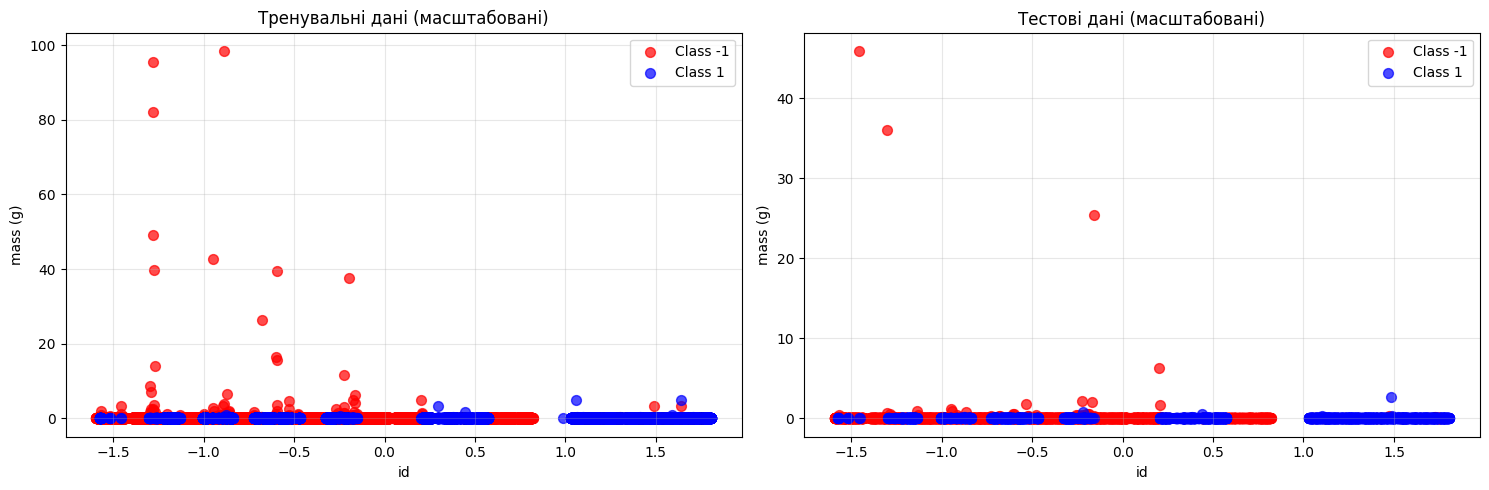


=== НАВЧАННЯ ПЕРСЕПТРОНА ===
Епоха 1, помилок: 11969
Епоха 101, помилок: 11977
Епоха 201, помилок: 12028
Епоха 301, помилок: 11965
Епоха 401, помилок: 12007
Епоха 501, помилок: 12015
Епоха 601, помилок: 12001
Епоха 701, помилок: 12008
Епоха 801, помилок: 11992
Епоха 901, помилок: 11971

=== РЕЗУЛЬТАТИ ===
Точність на тренувальних даних: 0.7714
Точність на тестових даних: 0.7578
Фінальні ваги: [ 0.20697358 -0.45120429]
Фінальне зміщення: -0.2000


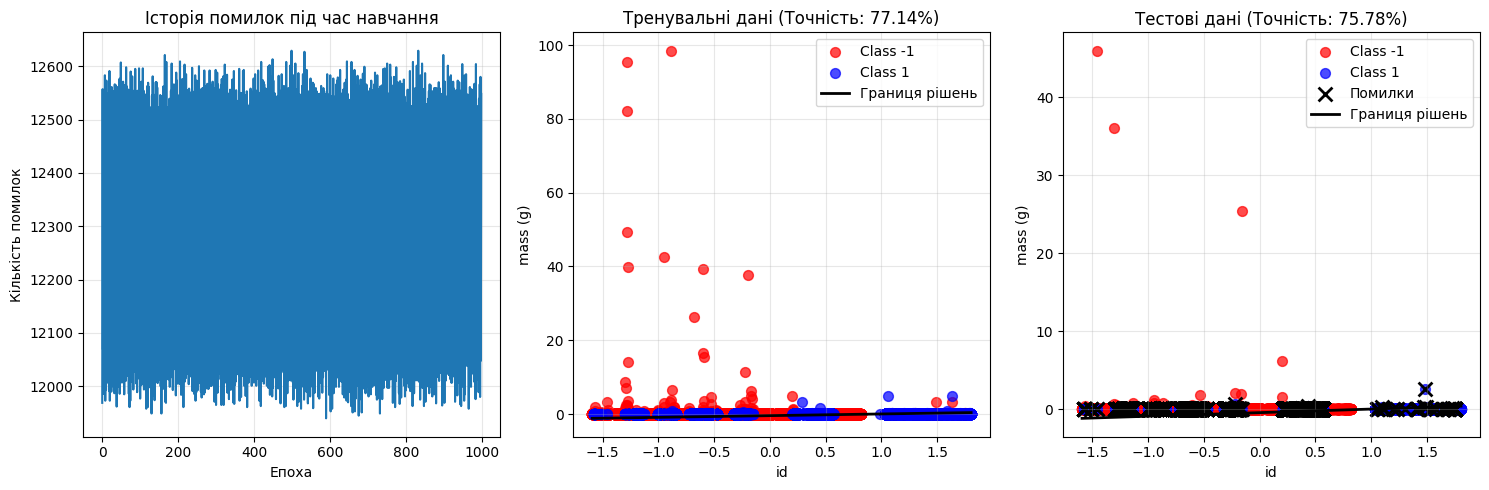


=== ДЕТАЛЬНА ОЦІНКА ===


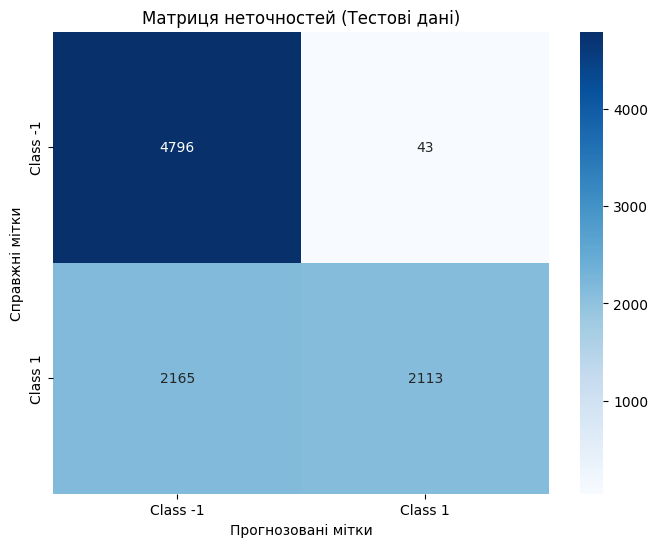


Звіт класифікації:
              precision    recall  f1-score   support

    Class -1       0.69      0.99      0.81      4839
     Class 1       0.98      0.49      0.66      4278

    accuracy                           0.76      9117
   macro avg       0.83      0.74      0.73      9117
weighted avg       0.83      0.76      0.74      9117


=== АНАЛІЗ ГРАНИЦІ РІШЕНЬ ===
Рівняння границі рішень: 0.2070*x1 + -0.4512*x2 + -0.2000 = 0
Або: x2 = (-0.2070*x1 + 0.2000) / -0.4512

=== ПЕРЕВІРКА ЛІНІЙНОЇ РОЗДІЛЬНОСТІ ===
✗ Дані не є лінійно роздільними
Рекомендація: Спробуйте використати нелінійні методи класифікації

=== ДОДАТКОВА ІНФОРМАЦІЯ ===
Кількість епох навчання: 1000
Фінальна кількість помилок: 12548
Розмір тренувального набору: (36468, 2)
Розмір тестового набору: (9117, 2)

=== ДЕМОНСТРАЦІЯ РОБОТИ ===
Прогнозування для перших 5 тестових прикладів:
Приклад 1: Прогноз = -1, Справжній = -1 ✓
Приклад 2: Прогноз = -1, Справжній = 1 ✗
Приклад 3: Прогноз = -1, Справжній = 1 ✗
Приклад 4:

In [ ]:
# Імпорт необхідних бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Завантаження файлу
from google.colab import files
uploaded = files.upload()

# Клас персептрона Розенблатта
class RosenblattPerceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.errors_history = []

    def activation_function(self, x):
        """Функція активації - знакова функція"""
        return np.where(x >= 0, 1, -1)

    def fit(self, X, y):
        """Навчання персептрона"""
        n_samples, n_features = X.shape

        # Ініціалізація ваг та зміщення
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0

        # Навчання
        for epoch in range(self.n_iters):
            total_error = 0
            for idx, x_i in enumerate(X):
                # Лінійна комбінація
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Прогноз
                y_pred = self.activation_function(linear_output)

                # Оновлення ваг та зміщення
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

                # Підрахунок помилки
                total_error += int(update != 0.0)

            self.errors_history.append(total_error)

            # Якщо помилок немає - зупиняємо навчання
            if total_error == 0:
                print(f"Навчання завершено на епосі {epoch + 1}")
                break
            elif epoch % 100 == 0:
                print(f"Епоха {epoch + 1}, помилок: {total_error}")

    def predict(self, X):
        """Прогнозування"""
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)

    def get_decision_boundary(self, X):
        """Отримання рівняння границі рішень"""
        if len(self.weights) != 2:
            raise ValueError("Ця функція працює тільки для 2D даних")

        # Для двох ознак: w1*x1 + w2*x2 + b = 0
        # x2 = (-w1*x1 - b) / w2
        x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
        x1_vals = np.linspace(x1_min, x1_max, 100)
        x2_vals = (-self.weights[0] * x1_vals - self.bias) / self.weights[1]

        return x1_vals, x2_vals

# Завантаження та підготовка даних
print("=== ЗАВАНТАЖЕННЯ ДАНИХ ===")

# Отримання імені завантаженого файлу
file_name = list(uploaded.keys())[0]
print(f"Завантажено файл: {file_name}")

# Завантаження даних
data = pd.read_csv(file_name)

print("\n=== ІНФОРМАЦІЯ ПРО ДАНІ ===")
print(f"Розмір датасету: {data.shape}")
print(f"Перші 5 рядків:")
print(data.head())
print(f"\nІнформація про стовпці:")
print(data.info())
print(f"\nСтатистика даних:")
print(data.describe(include='all'))

# Аналіз типів даних у кожному стовпці
print("\n=== АНАЛІЗ ТИПІВ ДАНИХ ===")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"{column}: {len(unique_values)} унікальних значень, тип: {data[column].dtype}")
    if len(unique_values) <= 10:
        print(f"  Значення: {unique_values}")

# Пошук числових стовпців для ознак
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nЧислові стовпці: {numeric_columns}")

# Пошук стовпця для цільової змінної
target_column = None
feature_columns = []

if len(numeric_columns) >= 3:
    # Використовуємо перші два числові стовпці для ознак
    feature_columns = numeric_columns[:2]
    target_column = numeric_columns[2]
    print(f"Автоматичне визначення з числових стовпців:")
elif len(numeric_columns) == 2:
    # Якщо тільки два числові стовпці, шукаємо категоріальний для цілі
    feature_columns = numeric_columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    if len(categorical_columns) > 0:
        target_column = categorical_columns[0]
        print(f"Використання категоріального стовпця для цілі: {target_column}")
    else:
        # Створюємо синтетичну цільову змінну
        target_column = 'Target'
        data[target_column] = np.where(data[numeric_columns[0]] > data[numeric_columns[0]].median(), 1, -1)
        print("Створено синтетичну цільову змінну")
else:
    # Якщо недостатньо числових стовпців, створюємо синтетичні дані
    print("Недостатньо числових стовпців. Використовую синтетичні дані...")
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                             n_informative=2, n_clusters_per_class=1,
                             random_state=42)
    data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
    data['Target'] = np.where(y == 0, -1, 1)
    feature_columns = ['Feature1', 'Feature2']
    target_column = 'Target'

print(f"\nОбрано ознаки: {feature_columns}")
print(f"Обрано цільову змінну: {target_column}")

# Перетворення цільової змінної
if data[target_column].dtype == 'object':
    # Кодування текстової цільової змінної
    le = LabelEncoder()
    data[target_column] = le.fit_transform(data[target_column])
    unique_classes = le.classes_
    print(f"Закодовані класи: {dict(zip(range(len(unique_classes)), unique_classes))}")

    # Аналіз розподілу класів
    class_counts = data[target_column].value_counts().sort_index()
    print(f"Розподіл класів після кодування:")
    for class_idx, count in class_counts.items():
        class_name = unique_classes[class_idx] if class_idx < len(unique_classes) else class_idx
        print(f"  Клас {class_name}: {count} прикладів")

    # Вибір двох найбільших класів
    top_classes = class_counts.head(2).index.tolist()
    if len(top_classes) >= 2:
        data = data[data[target_column].isin(top_classes)]
        # Перетворення у -1 та +1
        class_map = {top_classes[0]: -1, top_classes[1]: 1}
        data[target_column] = data[target_column].map(class_map)
        print(f"Використані два найбільші класи: {top_classes[0]} -> -1, {top_classes[1]} -> 1")
    else:
        # Якщо менше двох класів, створюємо синтетичні дані
        print("Недостатньо класів. Використовую синтетичні дані...")
        from sklearn.datasets import make_classification
        X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                                 n_informative=2, n_clusters_per_class=1,
                                 random_state=42)
        data = pd.DataFrame(X, columns=feature_columns)
        data[target_column] = np.where(y == 0, -1, 1)
else:
    # Для числових цільових змінних
    unique_values = data[target_column].unique()
    print(f"Унікальні значення числової цільової змінної: {unique_values}")

    if len(unique_values) > 2:
        # Якщо більше двох значень, використовуємо медіану для бінаризації
        median_val = data[target_column].median()
        data[target_column] = np.where(data[target_column] > median_val, 1, -1)
        print(f"Бінаризація за медіаною: > {median_val} -> 1, <= {median_val} -> -1")
    elif len(unique_values) == 2:
        # Якщо рівно два значення, перетворюємо їх у -1 та +1
        val1, val2 = unique_values
        data[target_column] = np.where(data[target_column] == val1, -1, 1)
        print(f"Перетворення двох значень: {val1} -> -1, {val2} -> 1")

# Вибір ознак та цільової змінної
X = data[feature_columns].values
y = data[target_column].values

print(f"\nФінальний розмір даних: {X.shape}")
print(f"Розподіл класів:")
class_distribution = pd.Series(y).value_counts().sort_index()
for class_val, count in class_distribution.items():
    print(f"  Клас {class_val}: {count} прикладів ({count/len(y)*100:.1f}%)")

# Перевірка мінімальної кількості прикладів у класі
min_class_count = class_distribution.min()
print(f"Мінімальна кількість прикладів у класі: {min_class_count}")

# Якщо один з класів має занадто мало прикладів, збалансуємо дані
if min_class_count < 5:
    print("\n--- ПОПЕРЕДЖЕННЯ: Небалансовані дані ---")
    print("Один з класів має занадто мало прикладів. Виконую балансування...")

    # Розділяємо дані за класами
    class_1_mask = (y == 1)
    class_minus_1_mask = (y == -1)

    X_class_1 = X[class_1_mask]
    y_class_1 = y[class_1_mask]
    X_class_minus_1 = X[class_minus_1_mask]
    y_class_minus_1 = y[class_minus_1_mask]

    # Знаходимо клас з меншою кількістю прикладів
    if len(X_class_1) < len(X_class_minus_1):
        minority_class = 1
        X_minority, y_minority = X_class_1, y_class_1
        X_majority, y_majority = X_class_minus_1, y_class_minus_1
    else:
        minority_class = -1
        X_minority, y_minority = X_class_minus_1, y_class_minus_1
        X_majority, y_majority = X_class_1, y_class_1

    # Вибірка того ж розміру з більшого класу
    n_samples = min(len(X_minority), len(X_majority))
    if n_samples < 2:
        n_samples = 2  # Мінімум 2 приклади на клас

    # Випадкова вибірка з більшого класу
    np.random.seed(42)
    indices = np.random.choice(len(X_majority), n_samples, replace=False)
    X_majority_balanced = X_majority[indices]
    y_majority_balanced = y_majority[indices]

    # Об'єднання збалансованих даних
    X_balanced = np.vstack([X_minority, X_majority_balanced])
    y_balanced = np.hstack([y_minority, y_majority_balanced])

    X, y = X_balanced, y_balanced
    print(f"Розмір після балансування: {X.shape}")
    print(f"Новий розподіл класів: {pd.Series(y).value_counts().sort_index().to_dict()}")

# Перевірка на наявність NaN значень
print(f"\nПеревірка на NaN:")
print(f"NaN в ознаках: {np.isnan(X).sum()}")
print(f"NaN в цільовій змінній: {np.isnan(y).sum()}")

# Видалення рядків з NaN значеннями (якщо є)
if np.isnan(X).any() or np.isnan(y).any():
    mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
    X = X[mask]
    y = y[mask]
    print(f"Розмір після видалення NaN: {X.shape}")

# Фінальна перевірка розподілу класів
final_class_dist = pd.Series(y).value_counts().sort_index()
print(f"\nФінальний розподіл класів:")
for class_val, count in final_class_dist.items():
    print(f"  Клас {class_val}: {count} прикладів")

# Якщо все ще недостатньо даних, використовуємо синтетичні дані
if len(X) < 10 or final_class_dist.min() < 2:
    print("\n--- НЕДОСТАТНЬО ДАНИХ ДЛЯ НАВЧАННЯ ---")
    print("Використовую синтетичні дані для демонстрації...")
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                             n_informative=2, n_clusters_per_class=1,
                             random_state=42)
    data = pd.DataFrame(X, columns=feature_columns)
    data[target_column] = np.where(y == 0, -1, 1)
    X = data[feature_columns].values
    y = data[target_column].values
    print("Створено синтетичні дані для демонстрації")

# Розділення на тренувальну та тестову вибірки
# Використовуємо stratify=False, щоб уникнути помилки при малій кількості даних
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print("Розділення з stratify=y")
except ValueError:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)
    print("Розділення без stratify (через малу кількість даних)")

# Масштабування даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n=== ПІДГОТОВКА ДАНИХ ===")
print(f"Тренувальний набір: {X_train_scaled.shape}")
print(f"Тестовий набір: {X_test_scaled.shape}")
print(f"Розподіл класів у тренувальному наборі: {pd.Series(y_train).value_counts().sort_index().to_dict()}")
print(f"Розподіл класів у тестовому наборі: {pd.Series(y_test).value_counts().sort_index().to_dict()}")

# Візуалізація даних перед навчанням
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[y_train == -1, 0], X_train_scaled[y_train == -1, 1],
            color='red', alpha=0.7, label='Class -1', s=50)
plt.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1],
            color='blue', alpha=0.7, label='Class 1', s=50)
plt.title('Тренувальні дані (масштабовані)')
plt.xlabel(feature_columns[0])
plt.ylabel(feature_columns[1])
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_test_scaled[y_test == -1, 0], X_test_scaled[y_test == -1, 1],
            color='red', alpha=0.7, label='Class -1', s=50)
plt.scatter(X_test_scaled[y_test == 1, 0], X_test_scaled[y_test == 1, 1],
            color='blue', alpha=0.7, label='Class 1', s=50)
plt.title('Тестові дані (масштабовані)')
plt.xlabel(feature_columns[0])
plt.ylabel(feature_columns[1])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Створення та навчання персептрона
print("\n=== НАВЧАННЯ ПЕРСЕПТРОНА ===")
perceptron = RosenblattPerceptron(learning_rate=0.1, n_iters=1000)
perceptron.fit(X_train_scaled, y_train)

# Прогнозування
y_pred_train = perceptron.predict(X_train_scaled)
y_pred_test = perceptron.predict(X_test_scaled)

# Обчислення точності
train_accuracy = np.mean(y_pred_train == y_train)
test_accuracy = np.mean(y_pred_test == y_test)

print(f"\n=== РЕЗУЛЬТАТИ ===")
print(f"Точність на тренувальних даних: {train_accuracy:.4f}")
print(f"Точність на тестових даних: {test_accuracy:.4f}")
print(f"Фінальні ваги: {perceptron.weights}")
print(f"Фінальне зміщення: {perceptron.bias:.4f}")

# Візуалізація результатів
plt.figure(figsize=(15, 5))

# 1. Історія помилок
plt.subplot(1, 3, 1)
plt.plot(perceptron.errors_history)
plt.title('Історія помилок під час навчання')
plt.xlabel('Епоха')
plt.ylabel('Кількість помилок')
plt.grid(True, alpha=0.3)

# 2. Границя рішень на тренувальних даних
plt.subplot(1, 3, 2)
plt.scatter(X_train_scaled[y_train == -1, 0], X_train_scaled[y_train == -1, 1],
            color='red', alpha=0.7, label='Class -1', s=50)
plt.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1],
            color='blue', alpha=0.7, label='Class 1', s=50)

# Додавання границі рішень
try:
    x1_vals, x2_vals = perceptron.get_decision_boundary(X_train_scaled)
    plt.plot(x1_vals, x2_vals, 'k-', linewidth=2, label='Границя рішень')
except Exception as e:
    print(f"Помилка при побудові границі рішень: {e}")

plt.title(f'Тренувальні дані (Точність: {train_accuracy:.2%})')
plt.xlabel(feature_columns[0])
plt.ylabel(feature_columns[1])
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Границя рішень на тестових даних
plt.subplot(1, 3, 3)
plt.scatter(X_test_scaled[y_test == -1, 0], X_test_scaled[y_test == -1, 1],
            color='red', alpha=0.7, label='Class -1', s=50)
plt.scatter(X_test_scaled[y_test == 1, 0], X_test_scaled[y_test == 1, 1],
            color='blue', alpha=0.7, label='Class 1', s=50)

# Позначення неправильних прогнозів
incorrect = (y_pred_test != y_test)
plt.scatter(X_test_scaled[incorrect, 0], X_test_scaled[incorrect, 1],
            color='black', marker='x', s=100, linewidth=2, label='Помилки')

# Додавання границі рішень
try:
    x1_vals, x2_vals = perceptron.get_decision_boundary(X_test_scaled)
    plt.plot(x1_vals, x2_vals, 'k-', linewidth=2, label='Границя рішень')
except Exception as e:
    print(f"Помилка при побудові границі рішень: {e}")

plt.title(f'Тестові дані (Точність: {test_accuracy:.2%})')
plt.xlabel(feature_columns[0])
plt.ylabel(feature_columns[1])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Матриця неточностей та звіт класифікації
print("\n=== ДЕТАЛЬНА ОЦІНКА ===")

# Матриця неточностей для тестових даних
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class -1', 'Class 1'],
            yticklabels=['Class -1', 'Class 1'])
plt.title('Матриця неточностей (Тестові дані)')
plt.ylabel('Справжні мітки')
plt.xlabel('Прогнозовані мітки')
plt.show()

# Звіт класифікації
print("\nЗвіт класифікації:")
print(classification_report(y_test, y_pred_test, target_names=['Class -1', 'Class 1']))

# Аналіз рівняння границі рішень
print("\n=== АНАЛІЗ ГРАНИЦІ РІШЕНЬ ===")
if len(perceptron.weights) == 2:
    w1, w2 = perceptron.weights
    b = perceptron.bias
    print(f"Рівняння границі рішень: {w1:.4f}*x1 + {w2:.4f}*x2 + {b:.4f} = 0")
    print(f"Або: x2 = ({-w1:.4f}*x1 + {-b:.4f}) / {w2:.4f}")

# Перевірка лінійної роздільності
print(f"\n=== ПЕРЕВІРКА ЛІНІЙНОЇ РОЗДІЛЬНОСТІ ===")
if test_accuracy > 0.95:
    print("✓ Дані є лінійно роздільними")
elif test_accuracy > 0.8:
    print("~ Дані майже лінійно роздільні")
else:
    print("✗ Дані не є лінійно роздільними")
    print("Рекомендація: Спробуйте використати нелінійні методи класифікації")

# Додаткова інформація про модель
print(f"\n=== ДОДАТКОВА ІНФОРМАЦІЯ ===")
print(f"Кількість епох навчання: {len(perceptron.errors_history)}")
print(f"Фінальна кількість помилок: {perceptron.errors_history[-1]}")
print(f"Розмір тренувального набору: {X_train_scaled.shape}")
print(f"Розмір тестового набору: {X_test_scaled.shape}")

# Демонстрація роботи персептрона на декількох прикладах
print(f"\n=== ДЕМОНСТРАЦІЯ РОБОТИ ===")
print("Прогнозування для перших 5 тестових прикладів:")
for i in range(min(5, len(X_test_scaled))):
    prediction = perceptron.predict(X_test_scaled[i:i+1])[0]
    actual = y_test[i]
    status = "✓" if prediction == actual else "✗"
    print(f"Приклад {i+1}: Прогноз = {prediction}, Справжній = {actual} {status}")